In [2]:
from pymontecarlo_casino2.program import Casino2Program
from pymontecarlo.options.material import Material
from pymontecarlo.options.sample import SubstrateSample
from pymontecarlo.options.beam import PencilBeam

In [3]:
import math
# incident_angle=70
# in_x=math.cos(incident_angle*2*math.pi/360)
# in_z=math.sin(incident_angle*2*math.pi/360)

In [4]:
# program=Casino2Program(5000)

In [5]:
# beam = PencilBeam(15e3,(in_x,0,in_z))



In [46]:
pip install seaborn

     -------------------------------------- 293.3/293.3 KB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\berners\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [175]:
import casinotools
import casinotools.fileformat.casino2 as cas2
from casinotools.fileformat import FileReaderWriterTools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
from pathlib import Path

In [97]:
# FileReaderWriterTools.FileReaderWriterTools.

In [98]:
mg_sim=cas2.File.File()

In [127]:
folder="I:/Mc_sim/**.cas"

ls_glob=glob.glob(folder)
ls_glob[4]

'I:/Mc_sim\\NbNi_20kv.cas'

In [184]:
winp=Path(path)
str(winp.parent)
str(Path(path).parent)

'I:\\Mc_sim'

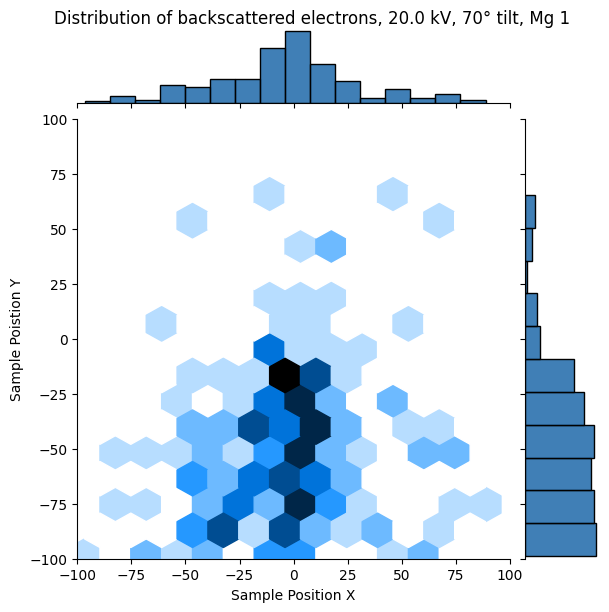

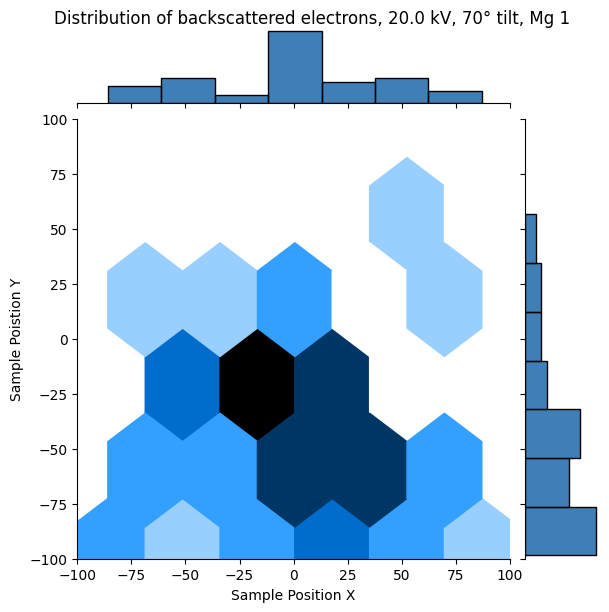

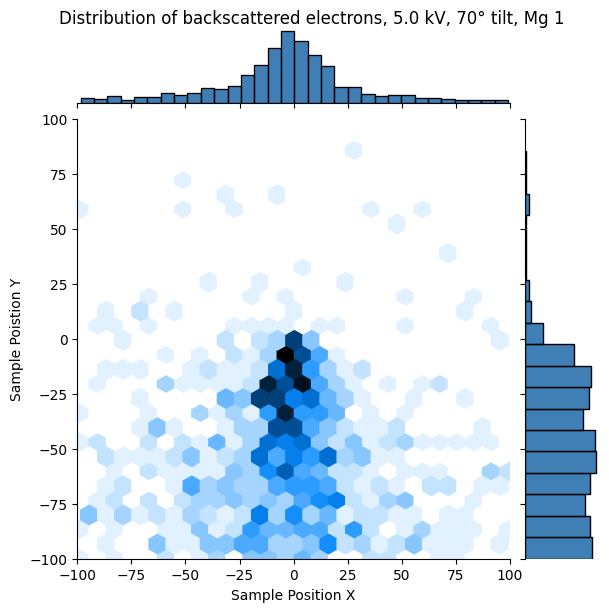

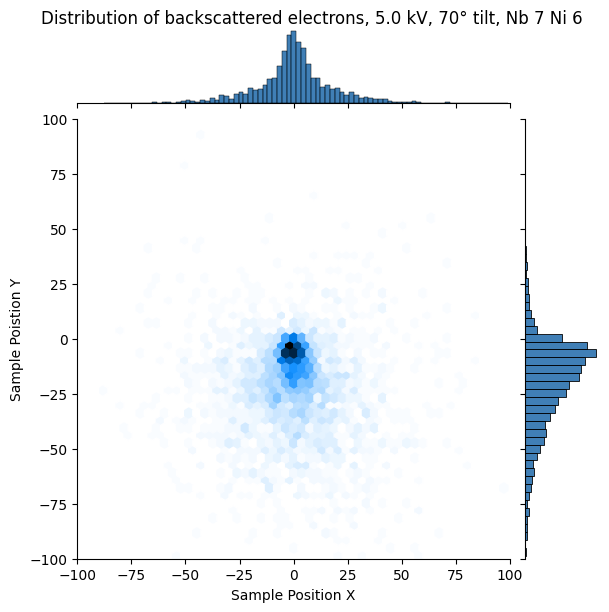

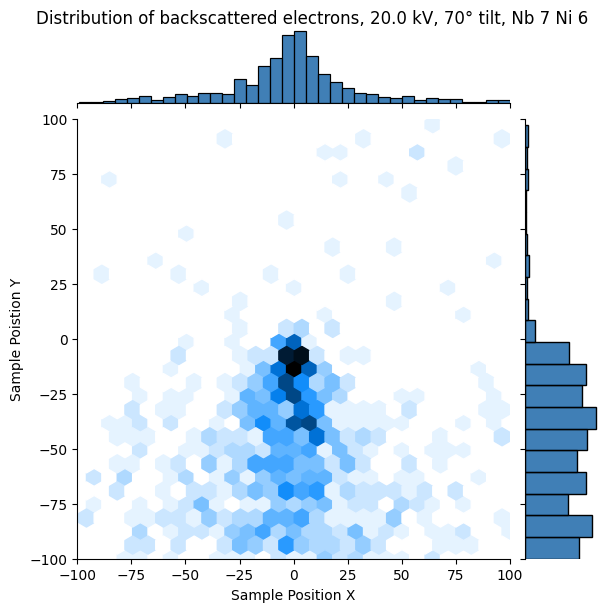

In [250]:
for path in glob.glob(folder):
    lim=100
    mc_sim=cas2.File.File()
    mc_sim.readFromFilepath(filepath=path)
    mc_sim_results=mc_sim.getResultsSimulation(0)
    mc_sim_trajectories=mc_sim_results.getTrajectoriesData()
    traj=mc_sim_trajectories.getTrajectories()
    scatterings_traj=traj[0].getScatteringEvents()
    #cords= [[ev.X,ev.Y] for ev in scatterings_traj]
    cords=[[[traj[j].getScatteringEvents()[-1].X,traj[j].getScatteringEvents()[-2].X],[traj[j].getScatteringEvents()[-1].Y,traj[j].getScatteringEvents()[-2].Y],[traj[j].getScatteringEvents()[-1].Z,traj[j].getScatteringEvents()[-2].Z]] for j in range(0,len(traj))]
    np_cords=np.array(cords)
    booleans=[trajectory.isBackscattered() for trajectory in traj]
    opts=mc_sim.getOptionSimulationData()
    regopts=opts.getRegionOptions()
    regions=regopts.getRegions()
    comp=[[el.getSymbol(),el.getRepetition()] for el in regions[0].getElements()]
    el_name=' '.join(np.ravel(np.array(comp)))
    opts=mc_sim.getOptionSimulationData()
    simopt=opts.getSimulationOptions()
    volts=simopt.getIncidentEnergy_keV()
    np_cords_sel_1=np_cords[booleans,0:2,0]
    np_cords_sel=np_cords_sel_1[(abs(np_cords_sel_1)<lim).all(axis=1),:]
    np_cords_sel
    p=sns.jointplot(x=np_cords_sel[:,1],y=-np_cords_sel[:,0],kind='hex',ylim=(-lim,lim),xlim=(-lim,lim),color=(0/256,84/256,159/256))
    p.fig.suptitle(f"Distribution of backscattered electrons, {volts} kV, 70° tilt, {el_name} ")
    p.fig.subplots_adjust(top=0.95)
    p.ax_joint.set_xlabel('Sample Position X')

    # p.ax_marg_y.set_ylab
    p.ax_joint.set_ylabel('Sample Poistion Y')
    # p.ax_marg_y
    #p.fig.savefig(''.format(eps),bbox_inches='tight')#,dpi=300)
    p.fig.savefig(f'{str(Path(path).parent)}_{volts}kv_{el_name}_lim{lim}.png',bbox_inches='tight',dpi=300)
        #plt.close()

In [103]:
# for path in glob.glob(folder):
#     mc_sim=cas2.File.File()
#     mc_sim.readFromFilepath(filepath=path)
#     mc_sim_5kv_results=mg_sim.getResultsSimulation(0)
#     mc_sim_5kv_trajectories=mg_sim_5kv_results.getTrajectoriesData()
#     traj=mg_sim_5kv_trajectories.getTrajectories()
#     scatterings_traj_1=traj[0].getScatteringEvents()
#     cords= [[ev.X,ev.Y] for ev in scatterings_traj_1]
#     np_cords=np.array(cords)
#     cords=[[[traj[j].getScatteringEvents()[-1].X,traj[j].getScatteringEvents()[-2].X],[traj[j].getScatteringEvents()[-1].Y,traj[j].getScatteringEvents()[-2].Y],[traj[j].getScatteringEvents()[-1].Z,traj[j].getScatteringEvents()[-2].Z]] for j in range(0,len(traj))]
#     booleans=[trajectory.isBackscattered() for trajectory in traj]




IndexError: list index out of range

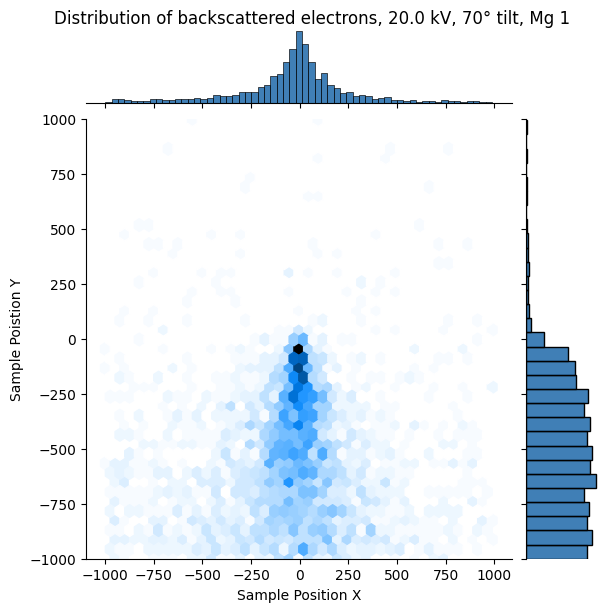

In [246]:

np_cords_sel_1=np_cords[booleans,0:2,0]
np_cords_sel=np_cords_sel_1[(abs(np_cords_sel_1)<1000).all(axis=1),:]
np_cords_sel
p=sns.jointplot(x=np_cords_sel[:,1],y=-np_cords_sel[:,0],kind='hex',ylim=(-1000,1000),color=(0/256,84/256,159/256))
p.fig.suptitle(f"Distribution of backscattered electrons, {volts} kV, 70° tilt, {el_name} ")
p.fig.subplots_adjust(top=0.95)
p.ax_joint.set_xlabel('Sample Position X')

# p.ax_marg_y.set_ylab
p.ax_joint.set_ylabel('Sample Poistion Y')
# p.ax_marg_y
#p.fig.savefig(''.format(eps),bbox_inches='tight')#,dpi=300)
p.fig.savefig(f'{str(Path(path).parent)}_{volts}kv_{el_name}.png',bbox_inches='tight',dpi=300)
    #plt.close()

In [232]:
(abs(np_cords[booleans,0:2,0])<1000).all(axis=1)
#np.cords[:,0:2,0]
np_cords_sel_1=np_cords[booleans,0:2,0]
np_cords_sel=np_cords_sel_1[(abs(np_cords_sel_1)<1000).all(axis=1),:]
np_cords_sel

array([[ 295.1882019 ,  -22.55311775],
       [ 991.7611084 ,   75.59117126],
       [ 327.32714844, -342.46871948],
       ...,
       [ 429.24035645,  -27.57143784],
       [ 470.99298096,  389.01986694],
       [ 290.92880249,  -40.81513596]])

In [108]:
opts=mc_sim.getOptionSimulationData()
opts.getEle

In [221]:
np_cords[:,0:2,0]

array([[ 1614.66577148, -2964.99487305],
       [  295.1882019 ,   -22.55311775],
       [-1786.36193848,   695.13220215],
       ...,
       [  290.92880249,   -40.81513596],
       [  732.6217041 ,  2703.69506836],
       [ 2334.74853516, -1938.90319824]])

In [170]:
opts=mc_sim.getOptionSimulationData()
simopt=opts.getSimulationOptions()
volts=simopt.getIncidentEnergy_keV()

20.0

In [166]:
list(zip(comp))
np.ravel(comp)

array(['Nb', '7', 'Ni', '6'], dtype='<U11')

In [11]:
mg_sim_5kv_trajectories=mg_sim_5kv_results.getTrajectoriesData()

In [12]:
traj=mg_sim_5kv_trajectories.getTrajectories()

In [13]:
scatterings_traj_1=traj[0].getScatteringEvents()

In [14]:


cords= [[ev.X,ev.Y] for ev in scatterings_traj_1]
# y_val= [ev.Y for e]

In [15]:
np_cords=np.array(cords)
np_cords

array([[  -0.4860397 ,   -5.65408659],
       [   5.09398174,   -5.65408659],
       [   9.43552208,   -5.66281986],
       [  31.41292   ,    1.37779927],
       [  38.98195267,    2.95892119],
       [  40.91441727,    3.34934473],
       [  48.67078781,    5.05656528],
       [  57.19723129,    7.50715351],
       [  73.73200989,   11.95941734],
       [  79.13909912,   12.04209328],
       [  82.45970917,   11.68805408],
       [  82.85047913,   11.48318672],
       [  85.00050354,   11.02873516],
       [  91.34104919,   10.02555943],
       [  97.17583466,    8.12346649],
       [ 105.40609741,    5.14773846],
       [ 112.58971405,    2.39016008],
       [ 114.81101227,    1.53746998],
       [ 115.98364258,    1.13669968],
       [ 129.64228821,   -4.54379082],
       [ 140.06448364,   -7.42288542],
       [ 155.19398499,  -13.06396866],
       [ 160.4495697 ,  -14.36587715],
       [ 160.86975098,  -14.44270802],
       [ 168.33642578,  -15.77230644],
       [ 179.59176636,  -

In [16]:
np_cords[:,1]

array([  -5.65408659,   -5.65408659,   -5.66281986,    1.37779927,
          2.95892119,    3.34934473,    5.05656528,    7.50715351,
         11.95941734,   12.04209328,   11.68805408,   11.48318672,
         11.02873516,   10.02555943,    8.12346649,    5.14773846,
          2.39016008,    1.53746998,    1.13669968,   -4.54379082,
         -7.42288542,  -13.06396866,  -14.36587715,  -14.44270802,
        -15.77230644,  -16.41494942,  -16.46198845,  -16.98980141,
        -16.73403549,  -16.17902756,  -16.07513046,  -15.33333015,
        -14.8887167 ,  -14.74050999,  -14.64404774,  -14.60524273,
        -15.49372482,  -17.39188576,  -19.58882713,  -26.56627083,
        -32.34519196,  -34.23133087,  -34.85614395,  -35.86578369,
        -51.43622589,  -49.23387909,  -47.63088226,  -47.72937393,
        -47.83847427,  -47.74095917,  -46.85305786,  -46.79629135,
        -44.63534164,  -44.30222702,  -41.17284393,  -40.43291473,
        -39.9353981 ,  -39.33409119,  -39.00753784,  -38.89525

In [17]:
# for j in range(0,len(traj)):
#     ev_list = traj[j].getScatteringEvents()
# #     print(j)
#     # for i in range(0,len(scatterings_traj_1)):
#     cords= [[ev.X,ev.Y,ev.Z] for ev in scatterings_traj_1]
#     np_cords=np.array(cords)
#     np_cords[:,1]
#         #plt.plot(np_cords[:,0],np_cords[:,1])


In [35]:
cords=[[[traj[j].getScatteringEvents()[-1].X,traj[j].getScatteringEvents()[-2].X],[traj[j].getScatteringEvents()[-1].Y,traj[j].getScatteringEvents()[-2].Y],[traj[j].getScatteringEvents()[-1].Z,traj[j].getScatteringEvents()[-2].Z]] for j in range(0,len(traj))]

In [58]:
booleans=[trajectory.isBackscattered() for trajectory in traj]

In [104]:
path

'I:/Mc_sim\\Mg_20kv.cas'

In [187]:
np_cords

array([[-1.26430905e+00,  8.94008279e-01],
       [ 4.87250214e+01,  8.94008279e-01],
       [ 1.17681496e+02,  4.85077810e+00],
       [ 1.49384186e+02,  5.88877058e+00],
       [ 1.56606216e+02,  6.23076153e+00],
       [ 1.72037872e+02,  6.47880030e+00],
       [ 1.88333542e+02,  6.99476862e+00],
       [ 2.05857254e+02,  7.43008423e+00],
       [ 2.12282501e+02,  6.68022680e+00],
       [ 2.30751022e+02,  4.19697285e+00],
       [ 3.59359741e+02, -2.36801872e+01],
       [ 4.57284821e+02, -5.36188660e+01],
       [ 4.68881866e+02, -5.62438202e+01],
       [ 4.72242126e+02, -5.71167336e+01],
       [ 4.97128662e+02, -6.39014626e+01],
       [ 5.14367493e+02, -6.82742157e+01],
       [ 5.54803711e+02, -7.79384232e+01],
       [ 5.78178650e+02, -8.42391663e+01],
       [ 5.87591736e+02, -8.66252365e+01],
       [ 5.90148804e+02, -8.75690384e+01],
       [ 6.15063904e+02, -9.76892853e+01],
       [ 6.79194885e+02, -1.20793884e+02],
       [ 6.86912109e+02, -1.23576736e+02],
       [ 7.

In [186]:
volts=5
p=sns.jointplot(x=np_cords[booleans,0,0],y=np_cords[booleans,1,0],kind='hex')
p.fig.suptitle(f"Distribution of backscattered electrons, {volts} kV, 70° tilt ")
p.fig.subplots_adjust(top=0.95)
p.ax_joint.set_xlabel('Sample Position X')
# p.ax_marg_y.set_ylab
p.ax_joint.set_ylabel('Sample Poistion Y')
# p.ax_marg_y
#p.fig.savefig(''.format(eps),bbox_inches='tight')#,dpi=300)
p.fig.savefig(f'{str(Path(path).parent)}_{volts}kv_{el_name}',bbox_inches='tight',dpi=300)
    #plt.close()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

(0.0, 1000.0)

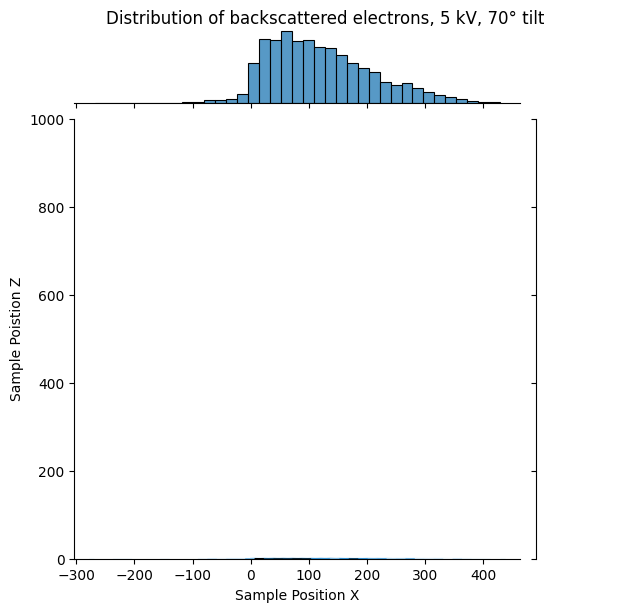

In [93]:
volts=5
p=sns.jointplot(x=np_cords[booleans,0,0],y=np_cords[booleans,2,0],kind='hex')
p.fig.suptitle(f"Distribution of backscattered electrons, {volts} kV, 70° tilt ")
p.fig.subplots_adjust(top=0.95)
p.ax_joint.set_xlabel('Sample Position X')
# p.ax_marg_y.set_ylab
p.ax_joint.set_ylabel('Sample Poistion Z')
p.ax_joint.set_ylim(0,1000)

In [ ]:
self.X

NameError: name 'self' is not defined

In [ ]:
scatterings_traj_1.X
scatterings_traj_1.Y

AttributeError: 'list' object has no attribute 'X'

In [ ]:
pip install casinotools


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement casinotools (from versions: none)
ERROR: No matching distribution found for casinotools
